In [1]:
library(dplyr)
library(car)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# 코로나변수 제외(전체기간)

In [2]:
전체<-read.csv('전체데이터_병합.csv')

In [3]:
head(전체)

y_m,city,location,area_cnt,em_cnt,em_g,pay_amt,제주도민_여,외국인거주_여,제주도민_남,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
2018-01,서귀포시,남원읍,52,9570,42437700,1270773,9306,200,9806,...,6.256586,62.92070,1.891667,0,0,0,0,7650.916,469.7003,1686.0106
2018-01,서귀포시,대륜동,38,21666,57612600,1676850,6637,95,6836,...,8.004301,66.79301,2.958333,0,0,0,0,7964.611,371.7235,420.8336
2018-01,서귀포시,대정읍,89,10185,38885550,1164122,10725,677,10360,...,5.417876,70.94086,1.870833,0,0,0,0,4994.301,410.5112,356.2630
2018-01,서귀포시,대천동,37,20280,53858550,1593709,6475,137,6685,...,8.004301,66.79301,2.958333,0,0,0,0,4671.394,234.2381,225.5745
2018-01,서귀포시,동홍동,49,45936,118701000,3501286,11569,642,11124,...,5.771505,69.94489,3.812500,0,0,0,0,3881.022,270.2584,353.6994
2018-01,서귀포시,서홍동,24,15597,47230450,1397423,5335,66,5302,...,5.771505,69.94489,3.812500,0,0,0,0,1671.296,426.8739,1355.5257


In [4]:
전체<-subset(전체,select=-c(em_cnt,pay_amt)) #타겟변수인 배출량과 상관성이 너무크다.
전체<-subset(전체,location!="알수없음") 
전체

,y_m,city,location,area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
1,2018-01,서귀포시,남원읍,52,42437700,9306,200,9806,428,5554,...,6.256586,62.92070,1.891667,0,0,0,0,7650.916,469.7003,1686.0106
2,2018-01,서귀포시,대륜동,38,57612600,6637,95,6836,83,2925,...,8.004301,66.79301,2.958333,0,0,0,0,7964.611,371.7235,420.8336
3,2018-01,서귀포시,대정읍,89,38885550,10725,677,10360,841,5330,...,5.417876,70.94086,1.870833,0,0,0,0,4994.301,410.5112,356.2630
4,2018-01,서귀포시,대천동,37,53858550,6475,137,6685,107,2372,...,8.004301,66.79301,2.958333,0,0,0,0,4671.394,234.2381,225.5745
5,2018-01,서귀포시,동홍동,49,118701000,11569,642,11124,624,3898,...,5.771505,69.94489,3.812500,0,0,0,0,3881.022,270.2584,353.6994
6,2018-01,서귀포시,서홍동,24,47230450,5335,66,5302,61,1857,...,5.771505,69.94489,3.812500,0,0,0,0,1671.296,426.8739,1355.5257
7,2018-01,서귀포시,성산읍,74,11343100,7332,560,8006,1015,4642,...,4.979167,67.88172,1.879167,0,0,0,0,11249.047,618.5432,785.5332
8,2018-01,서귀포시,송산동,20,22834700,2111,157,2344,366,1298,...,7.498925,63.95296,2.262500,0,0,0,0,1888.063,958.0544,151.0939
9,2018-01,서귀포시,안덕면,67,10007850,5524,264,5938,258,3031,...,5.869355,69.06855,2.150000,0,0,0,0,10304.252,472.3279,722.1710
10,2018-01,서귀포시,영천동,35,26620950,2526,60,2640,111,1514,...,5.847849,70.98925,1.537500,0,0,0,0,2474.981,414.1342,314.5992


In [5]:
변수제거<-subset(전체,select=-c(y_m,city,location))
변수제거

,area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,제주도민_60미만,total_pop,패스트푸드_결제건수,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
1,52,42437700,9306,200,9806,428,5554,14186,19740,3337,...,6.256586,62.92070,1.891667,0,0,0,0,7650.916,469.7003,1686.0106
2,38,57612600,6637,95,6836,83,2925,10726,13651,4889,...,8.004301,66.79301,2.958333,0,0,0,0,7964.611,371.7235,420.8336
3,89,38885550,10725,677,10360,841,5330,17273,22603,5221,...,5.417876,70.94086,1.870833,0,0,0,0,4994.301,410.5112,356.2630
4,37,53858550,6475,137,6685,107,2372,11032,13404,5136,...,8.004301,66.79301,2.958333,0,0,0,0,4671.394,234.2381,225.5745
5,49,118701000,11569,642,11124,624,3898,20061,23959,6908,...,5.771505,69.94489,3.812500,0,0,0,0,3881.022,270.2584,353.6994
6,24,47230450,5335,66,5302,61,1857,8907,10764,3904,...,5.771505,69.94489,3.812500,0,0,0,0,1671.296,426.8739,1355.5257
7,74,11343100,7332,560,8006,1015,4642,12271,16913,2344,...,4.979167,67.88172,1.879167,0,0,0,0,11249.047,618.5432,785.5332
8,20,22834700,2111,157,2344,366,1298,3680,4978,880,...,7.498925,63.95296,2.262500,0,0,0,0,1888.063,958.0544,151.0939
9,67,10007850,5524,264,5938,258,3031,8953,11984,2185,...,5.869355,69.06855,2.150000,0,0,0,0,10304.252,472.3279,722.1710
10,35,26620950,2526,60,2640,111,1514,3823,5337,1284,...,5.847849,70.98925,1.537500,0,0,0,0,2474.981,414.1342,314.5992


In [6]:
변수제거2<-subset(변수제거,select=-c(전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자))
변수제거2

,area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,제주도민_60미만,total_pop,패스트푸드_결제건수,...,배달_결제금액,식당_결제건수,식당_결제금액,풍속,기온,습도,강수,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
1,52,42437700,9306,200,9806,428,5554,14186,19740,3337,...,5163749,17810,661392952,2.619220,6.256586,62.92070,1.891667,7650.916,469.7003,1686.0106
2,38,57612600,6637,95,6836,83,2925,10726,13651,4889,...,9839787,23440,812067796,1.831317,8.004301,66.79301,2.958333,7964.611,371.7235,420.8336
3,89,38885550,10725,677,10360,841,5330,17273,22603,5221,...,9267134,29023,987405447,6.011290,5.417876,70.94086,1.870833,4994.301,410.5112,356.2630
4,37,53858550,6475,137,6685,107,2372,11032,13404,5136,...,8813941,21592,703082321,1.831317,8.004301,66.79301,2.958333,4671.394,234.2381,225.5745
5,49,118701000,11569,642,11124,624,3898,20061,23959,6908,...,15937712,38565,1464008139,1.109409,5.771505,69.94489,3.812500,3881.022,270.2584,353.6994
6,24,47230450,5335,66,5302,61,1857,8907,10764,3904,...,2841908,18973,697930995,1.109409,5.771505,69.94489,3.812500,1671.296,426.8739,1355.5257
7,74,11343100,7332,560,8006,1015,4642,12271,16913,2344,...,4000177,13216,481052341,3.737366,4.979167,67.88172,1.879167,11249.047,618.5432,785.5332
8,20,22834700,2111,157,2344,366,1298,3680,4978,880,...,2253690,5436,217431175,1.009274,7.498925,63.95296,2.262500,1888.063,958.0544,151.0939
9,67,10007850,5524,264,5938,258,3031,8953,11984,2185,...,3701698,12475,452663606,4.884812,5.869355,69.06855,2.150000,10304.252,472.3279,722.1710
10,35,26620950,2526,60,2640,111,1514,3823,5337,1284,...,610313,6049,235941359,1.265860,5.847849,70.98925,1.537500,2474.981,414.1342,314.5992


# 0.선형성

In [7]:
다중회귀1<-lm(em_g ~ .,data=변수제거2)
summary(다중회귀1)


Call:
lm(formula = em_g ~ ., data = 변수제거2)

Residuals:
      Min        1Q    Median        3Q       Max 
-72590447  -6599796    596280   7329838  55627416 

Coefficients: (2 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.437e+06  3.972e+06   1.621 0.105250    
area_cnt               -2.408e+05  4.121e+04  -5.844 6.16e-09 ***
제주도민_여             2.789e+04  2.209e+03  12.625  < 2e-16 ***
외국인거주_여          -1.611e+04  6.923e+03  -2.327 0.020069 *  
제주도민_남            -2.673e+04  1.985e+03 -13.466  < 2e-16 ***
외국인거주_남           2.209e+04  3.843e+03   5.749 1.08e-08 ***
제주도민_60이상         3.531e+02  8.812e+02   0.401 0.688673    
제주도민_60미만                NA         NA      NA       NA    
total_pop                      NA         NA      NA       NA    
패스트푸드_결제건수     2.331e+03  1.112e+03   2.096 0.036212 *  
패스트푸드_결제금액     2.146e-01  5.452e-02   3.936 8.65e-05 ***
간식_결제건수           3.406e+02  8.313e+02   0.410

In [8]:
#total_pop,제주도민_60미만 제거
선형성1<-subset(변수제거2,select=-c(total_pop,제주도민_60미만))
다중회귀2<-lm(em_g ~ .,data=선형성1)
summary(다중회귀2)


Call:
lm(formula = em_g ~ ., data = 선형성1)

Residuals:
      Min        1Q    Median        3Q       Max 
-72590447  -6599796    596280   7329838  55627416 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.437e+06  3.972e+06   1.621 0.105250    
area_cnt               -2.408e+05  4.121e+04  -5.844 6.16e-09 ***
제주도민_여             2.789e+04  2.209e+03  12.625  < 2e-16 ***
외국인거주_여          -1.611e+04  6.923e+03  -2.327 0.020069 *  
제주도민_남            -2.673e+04  1.985e+03 -13.466  < 2e-16 ***
외국인거주_남           2.209e+04  3.843e+03   5.749 1.08e-08 ***
제주도민_60이상         3.531e+02  8.812e+02   0.401 0.688673    
패스트푸드_결제건수     2.331e+03  1.112e+03   2.096 0.036212 *  
패스트푸드_결제금액     2.146e-01  5.452e-02   3.936 8.65e-05 ***
간식_결제건수           3.406e+02  8.313e+02   0.410 0.682095    
간식_결제금액          -1.055e-01  6.081e-02  -1.735 0.082857 .  
농축수산물_결제건수    -4.856e+02  3.328e+02  -1.459 0.144690    
농축수산물_결제금액     6.531e-02  7.485e-03  

# 1. 다중공선성

In [9]:
backward <- step(다중회귀2, direction = "backward", trace = T)
backward
backward$anova 

Start:  AIC=53729.73
em_g ~ area_cnt + 제주도민_여 + 외국인거주_여 + 제주도민_남 + 
    외국인거주_남 + 제주도민_60이상 + 패스트푸드_결제건수 + 패스트푸드_결제금액 + 
    간식_결제건수 + 간식_결제금액 + 농축수산물_결제건수 + 농축수산물_결제금액 + 
    마트.슈퍼마켓_결제건수 + 마트.슈퍼마켓_결제금액 + 식품_결제건수 + 
    식품_결제금액 + 배달_결제건수 + 배달_결제금액 + 식당_결제건수 + 
    식당_결제금액 + 풍속 + 기온 + 습도 + 강수 + visit_pop_cnt + 
    visit_pop_cnt_lf + visit_pop_cnt_sf

                         Df  Sum of Sq        RSS   AIC
- 강수                    1 1.4840e+13 3.0130e+17 53728
- 배달_결제건수           1 2.1918e+13 3.0131e+17 53728
- 제주도민_60이상         1 3.0126e+13 3.0132e+17 53728
- 식품_결제건수           1 3.0885e+13 3.0132e+17 53728
- 간식_결제건수           1 3.1487e+13 3.0132e+17 53728
- 배달_결제금액           1 3.8956e+13 3.0133e+17 53728
- 식품_결제금액           1 5.7794e+13 3.0135e+17 53728
<none>                                 3.0129e+17 53730
- 농축수산물_결제건수     1 3.9948e+14 3.0169e+17 53730
- 기온                    1 4.2404e+14 3.0171e+17 53730
- visit_pop_cnt           1 4.6418e+14 3.0175e+17 53730
- 간식_결제금액           1 5


Call:
lm(formula = em_g ~ area_cnt + 제주도민_여 + 외국인거주_여 + 
    제주도민_남 + 외국인거주_남 + 패스트푸드_결제건수 + 패스트푸드_결제금액 + 
    간식_결제금액 + 농축수산물_결제건수 + 농축수산물_결제금액 + 
    마트.슈퍼마켓_결제건수 + 마트.슈퍼마켓_결제금액 + 식품_결제금액 + 
    식당_결제건수 + 식당_결제금액 + 풍속 + 습도 + visit_pop_cnt + 
    visit_pop_cnt_lf + visit_pop_cnt_sf, data = 선형성1)

Coefficients:
           (Intercept)                area_cnt             제주도민_여  
             7.258e+06              -2.395e+05               2.822e+04  
         외국인거주_여             제주도민_남           외국인거주_남  
            -1.589e+04              -2.669e+04               2.196e+04  
   패스트푸드_결제건수     패스트푸드_결제금액           간식_결제금액  
             2.573e+03               2.211e-01              -8.621e-02  
   농축수산물_결제건수     농축수산물_결제금액  마트.슈퍼마켓_결제건수  
            -6.328e+02               6.582e-02               1.063e+03  
마트.슈퍼마켓_결제금액           식품_결제금액           식당_결제건수  
            -2.017e-02               5.434e-03              -9.054e+02  
         식당_결제금액                    풍속              

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,1606,3.012883e+17,53729.73
- 강수,1,1.483985e+13,1607,3.013031e+17,53727.81
- 배달_결제건수,1,2.390481e+13,1608,3.013270e+17,53725.94
- 간식_결제건수,1,2.406544e+13,1609,3.013511e+17,53724.07
- 식품_결제건수,1,3.488261e+13,1610,3.013860e+17,53722.26
- 제주도민_60이상,1,7.463959e+13,1611,3.014606e+17,53720.66
- 배달_결제금액,1,1.787598e+14,1612,3.016394e+17,53719.63
- 기온,1,3.129904e+14,1613,3.019523e+17,53719.32


In [10]:
#위 변수들 제거
선형성2<-subset(선형성1,select=-c(강수,배달_결제건수,간식_결제건수,식품_결제건수,제주도민_60이상,배달_결제금액,기온))
다중회귀3<-lm(em_g ~ .,data=선형성2)
summary(다중회귀3)


Call:
lm(formula = em_g ~ ., data = 선형성2)

Residuals:
      Min        1Q    Median        3Q       Max 
-72334096  -6674796    526313   7456478  55796016 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.258e+06  3.539e+06   2.051  0.04043 *  
area_cnt               -2.395e+05  3.643e+04  -6.574 6.58e-11 ***
제주도민_여             2.822e+04  1.941e+03  14.539  < 2e-16 ***
외국인거주_여          -1.589e+04  6.434e+03  -2.470  0.01361 *  
제주도민_남            -2.669e+04  1.882e+03 -14.181  < 2e-16 ***
외국인거주_남           2.196e+04  3.608e+03   6.085 1.45e-09 ***
패스트푸드_결제건수     2.573e+03  1.035e+03   2.486  0.01301 *  
패스트푸드_결제금액     2.211e-01  4.938e-02   4.477 8.10e-06 ***
간식_결제금액          -8.621e-02  3.371e-02  -2.558  0.01063 *  
농축수산물_결제건수    -6.328e+02  3.150e+02  -2.009  0.04469 *  
농축수산물_결제금액     6.582e-02  6.856e-03   9.601  < 2e-16 ***
마트.슈퍼마켓_결제건수  1.063e+03  1.050e+02  10.125  < 2e-16 ***
마트.슈퍼마켓_결제금액 -2.017e-02  3.039e-03  -6.637 4

In [11]:
backward2 <- step(다중회귀3, direction = "backward", trace = T)
backward2
backward2$anova 

Start:  AIC=53719.32
em_g ~ area_cnt + 제주도민_여 + 외국인거주_여 + 제주도민_남 + 
    외국인거주_남 + 패스트푸드_결제건수 + 패스트푸드_결제금액 + 
    간식_결제금액 + 농축수산물_결제건수 + 농축수산물_결제금액 + 
    마트.슈퍼마켓_결제건수 + 마트.슈퍼마켓_결제금액 + 식품_결제금액 + 
    식당_결제건수 + 식당_결제금액 + 풍속 + 습도 + visit_pop_cnt + 
    visit_pop_cnt_lf + visit_pop_cnt_sf

                         Df  Sum of Sq        RSS   AIC
<none>                                 3.0195e+17 53719
- visit_pop_cnt           1 4.3901e+14 3.0239e+17 53720
- 식품_결제금액           1 5.1319e+14 3.0247e+17 53720
- 농축수산물_결제건수     1 7.5562e+14 3.0271e+17 53721
- visit_pop_cnt_lf        1 1.0614e+15 3.0301e+17 53723
- 풍속                    1 1.0670e+15 3.0302e+17 53723
- 외국인거주_여           1 1.1423e+15 3.0309e+17 53723
- 패스트푸드_결제건수     1 1.1571e+15 3.0311e+17 53724
- 간식_결제금액           1 1.2245e+15 3.0318e+17 53724
- visit_pop_cnt_sf        1 1.7077e+15 3.0366e+17 53727
- 습도                    1 3.0805e+15 3.0503e+17 53734
- 패스트푸드_결제금액     1 3.7522e+15 3.0570e+17 53738
- 식당_결제건수           1 4.3048e+15 3


Call:
lm(formula = em_g ~ area_cnt + 제주도민_여 + 외국인거주_여 + 
    제주도민_남 + 외국인거주_남 + 패스트푸드_결제건수 + 패스트푸드_결제금액 + 
    간식_결제금액 + 농축수산물_결제건수 + 농축수산물_결제금액 + 
    마트.슈퍼마켓_결제건수 + 마트.슈퍼마켓_결제금액 + 식품_결제금액 + 
    식당_결제건수 + 식당_결제금액 + 풍속 + 습도 + visit_pop_cnt + 
    visit_pop_cnt_lf + visit_pop_cnt_sf, data = 선형성2)

Coefficients:
           (Intercept)                area_cnt             제주도민_여  
             7.258e+06              -2.395e+05               2.822e+04  
         외국인거주_여             제주도민_남           외국인거주_남  
            -1.589e+04              -2.669e+04               2.196e+04  
   패스트푸드_결제건수     패스트푸드_결제금액           간식_결제금액  
             2.573e+03               2.211e-01              -8.621e-02  
   농축수산물_결제건수     농축수산물_결제금액  마트.슈퍼마켓_결제건수  
            -6.328e+02               6.582e-02               1.063e+03  
마트.슈퍼마켓_결제금액           식품_결제금액           식당_결제건수  
            -2.017e-02               5.434e-03              -9.054e+02  
         식당_결제금액                    풍속              

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,1613,3.019523e+17,53719.32


In [12]:
vif(다중회귀3)

area_cnt            제주도민_여          외국인거주_여 
             20.685807            1444.619678              28.145547 
           제주도민_남          외국인거주_남    패스트푸드_결제건수 
           1280.207304              16.054308             313.685818 
   패스트푸드_결제금액          간식_결제금액    농축수산물_결제건수 
            191.818465              84.282822              12.168944 
   농축수산물_결제금액 마트.슈퍼마켓_결제건수 마트.슈퍼마켓_결제금액 
             13.354427             100.800571              80.365382 
         식품_결제금액          식당_결제건수          식당_결제금액 
             14.249788             490.566525             357.312445 
                  풍속                   습도          visit_pop_cnt 
              1.905966               1.255706               4.133433 
      visit_pop_cnt_lf       visit_pop_cnt_sf 
              2.400750               2.144052

### 공선성 제거(인구자료 목표)

In [13]:
#공선성원인제거(인구자료 목표) -> 과정은 코로나 이후 분석 참고
선형성3<-subset(선형성2,select=-c(패스트푸드_결제건수,패스트푸드_결제금액,간식_결제금액,농축수산물_결제건수,농축수산물_결제금액,마트.슈퍼마켓_결제건수,마트.슈퍼마켓_결제금액,식품_결제금액,식당_결제건수,식당_결제금액,제주도민_남,외국인거주_여,풍속))
다중회귀4<-lm(em_g ~ .,data=선형성3)
summary(다중회귀4)
vif(다중회귀4)


Call:
lm(formula = em_g ~ ., data = 선형성3)

Residuals:
      Min        1Q    Median        3Q       Max 
-92129880  -8449939   2071330  10528220 105307186 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -5145931.2  4146326.7  -1.241    0.215    
area_cnt          -602275.4    36709.4 -16.407  < 2e-16 ***
제주도민_여         11874.6      192.9  61.545  < 2e-16 ***
외국인거주_남       10403.0     1810.9   5.745 1.10e-08 ***
습도               289771.6    54539.0   5.313 1.23e-07 ***
visit_pop_cnt       -2169.0      218.0  -9.951  < 2e-16 ***
visit_pop_cnt_lf   -18079.0     2918.5  -6.195 7.38e-10 ***
visit_pop_cnt_sf     5223.1      502.6  10.392  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20180000 on 1626 degrees of freedom
Multiple R-squared:  0.8834,	Adjusted R-squared:  0.8829 
F-statistic:  1760 on 7 and 1626 DF,  p-value: < 2.2e-16


area_cnt      제주도민_여    외국인거주_남             습도 
        9.656136         6.562503         1.858925         1.027187 
   visit_pop_cnt visit_pop_cnt_lf visit_pop_cnt_sf 
        2.969996         1.962802         1.394453

### 공선성 제거(결제자료 목표)

In [14]:
#공선성제거(결제자료 목표) -> 과정은 코로나 이후 데이터 분석 참고
선형성4<-subset(선형성2,select=-c(area_cnt,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf,패스트푸드_결제건수,식당_결제건수,마트.슈퍼마켓_결제건수,간식_결제금액,농축수산물_결제건수,식당_결제금액,식품_결제금액,패스트푸드_결제금액,습도))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-84942776  -8859387   1179551   9420849  88491318 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.883e+06  1.508e+06   3.900 1.00e-04 ***
농축수산물_결제금액     1.140e-01  5.005e-03  22.778  < 2e-16 ***
마트.슈퍼마켓_결제금액  3.761e-02  8.885e-04  42.328  < 2e-16 ***
풍속                   -2.163e+06  5.210e+05  -4.152 3.47e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19420000 on 1630 degrees of freedom
Multiple R-squared:  0.8917,	Adjusted R-squared:  0.8915 
F-statistic:  4475 on 3 and 1630 DF,  p-value: < 2.2e-16


농축수산물_결제금액 마트.슈퍼마켓_결제금액                   풍속 
              3.532392               3.410239               1.070028

### 유의변수 추출은 여기까지

--------

# 2.등분산성

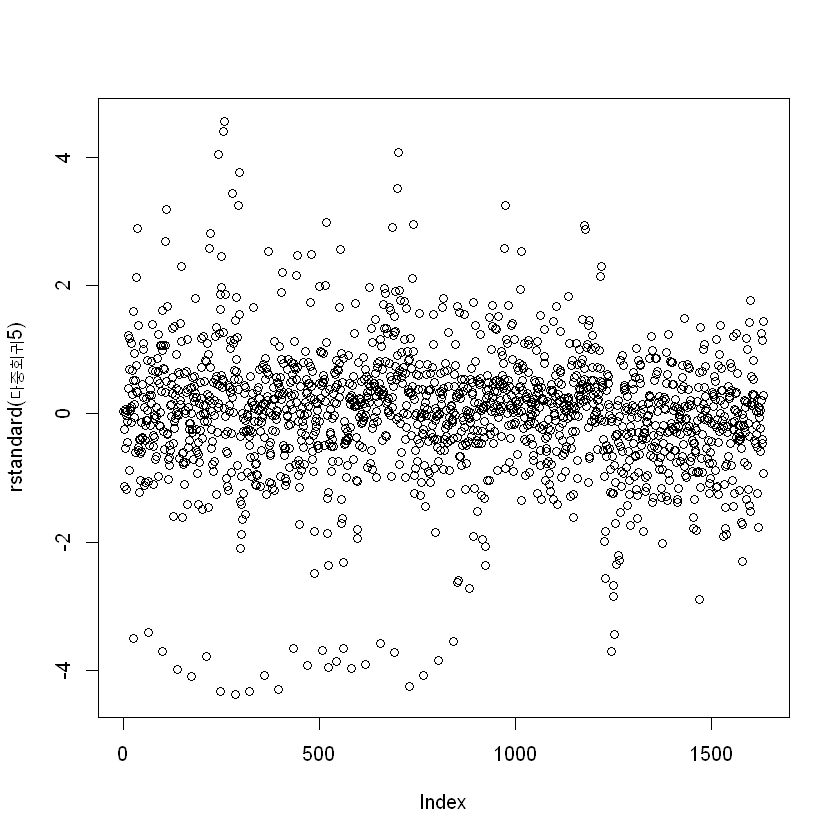

In [15]:
plot(rstandard(다중회귀5)) #잔차의 등분산성

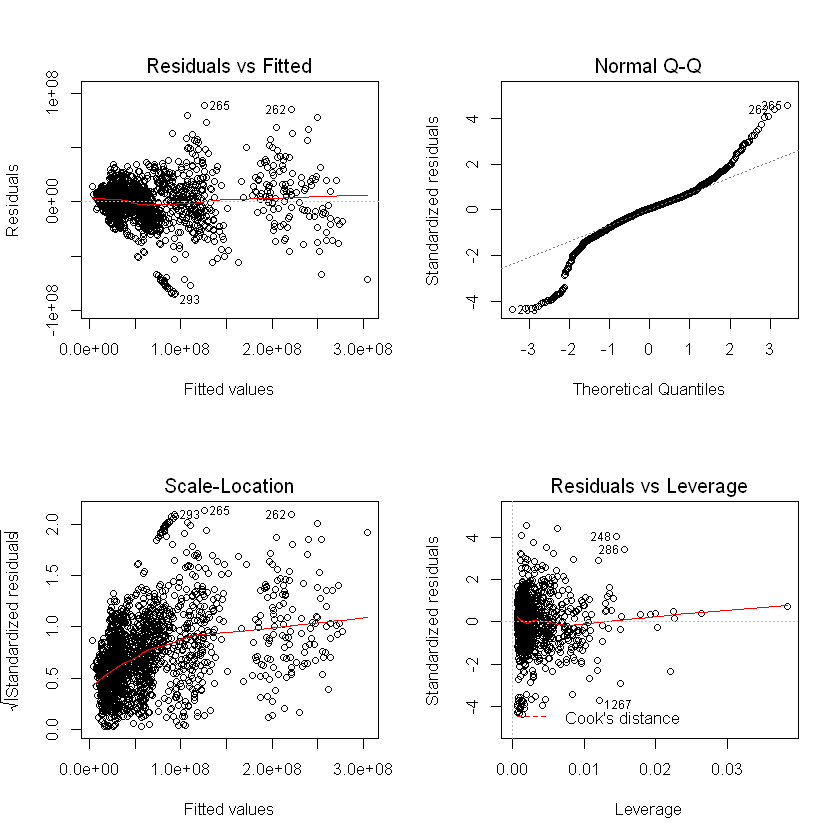

In [16]:
par(mfrow=c(2,2))
plot(다중회귀5)#잔차의 등분산성

# 3.정규성

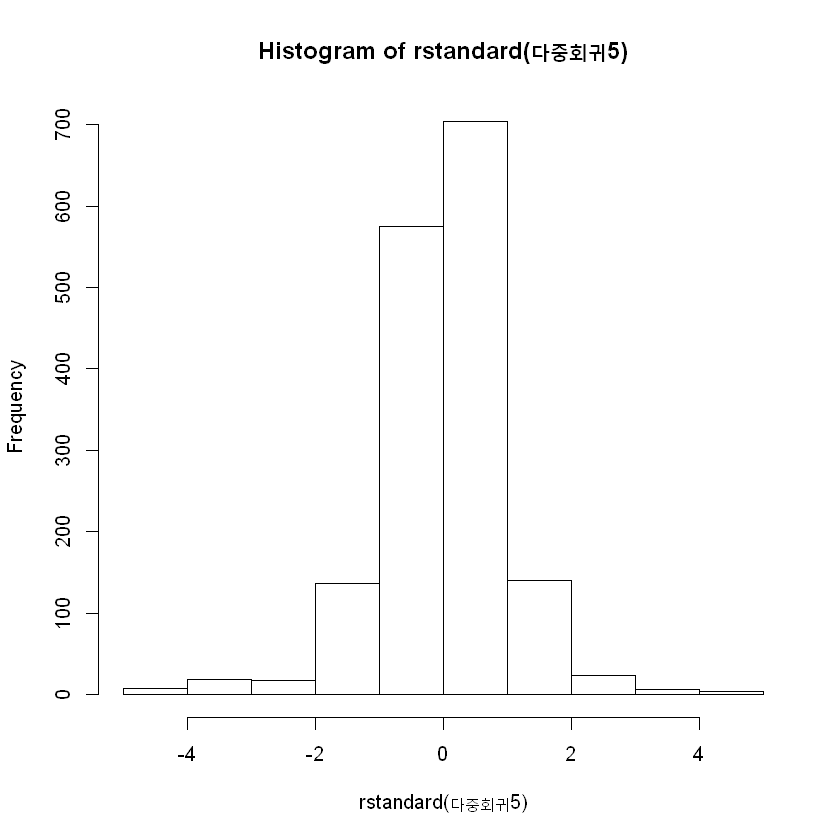

In [17]:
hist(rstandard(다중회귀5))#잔차의 정규성

In [18]:
shapiro.test(residuals(다중회귀5)) 
#귀무가설 = 정규분포와 차이가 없다. -> 기각 -> 정규분포와 차이가 있음.
#출처 : https://m.blog.naver.com/shoutjoy/221830887127


	Shapiro-Wilk normality test

data:  residuals(다중회귀5)
W = 0.93008, p-value < 2.2e-16
